# Task 1
## Exploratory Data Analysis (EDA) on Retail Sales Data
### Description:
In this project, you will work with a dataset containing information about retail sales. The goal is
to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can
help the retail business make informed decisions.

## Data Loading and Cleaning

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objects as go
sns.set()

In [8]:
df = pd.read_csv('retail_sales_dataset.csv')

In [9]:
df.head() 

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [11]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [12]:
df.shape

(1000, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [14]:
df.info

<bound method DataFrame.info of      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount

In [17]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

## Descriptive Statistics

In [18]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


## Time Series Analysis

In [20]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [23]:
df['Date']=pd.to_datetime(df['Date'])
df['month']=df['Date'].dt.month_name()
df['month'].head()

0    November
1    February
2     January
3         May
4         May
Name: month, dtype: object

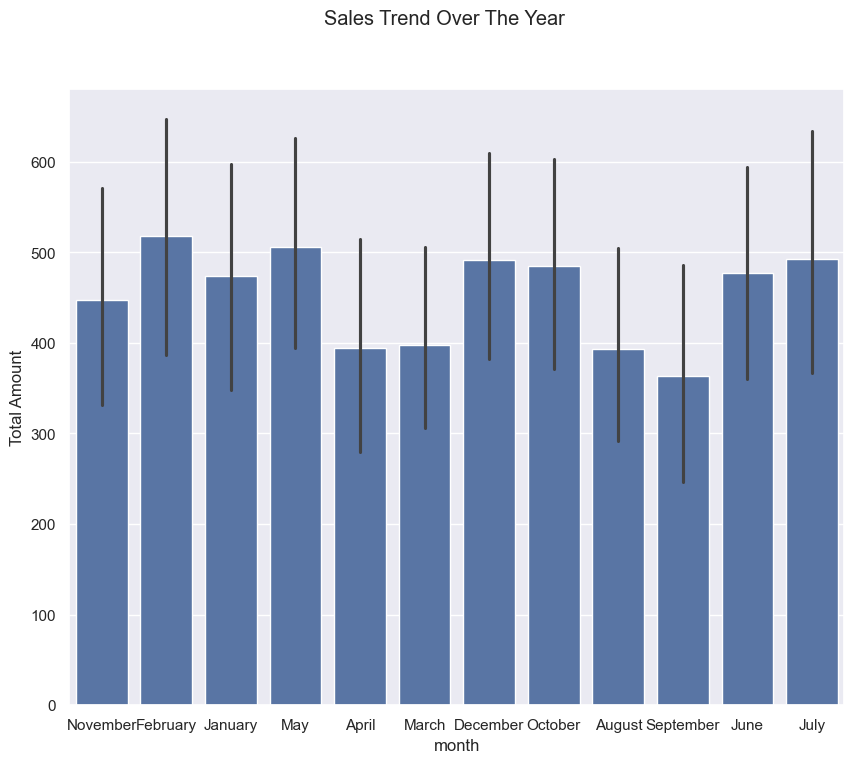

In [26]:
plt.figure(figsize=(10,8))
sns.barplot(x='month',y='Total Amount',data=df)
plt.suptitle('Sales Trend Over The Year')
plt.show()

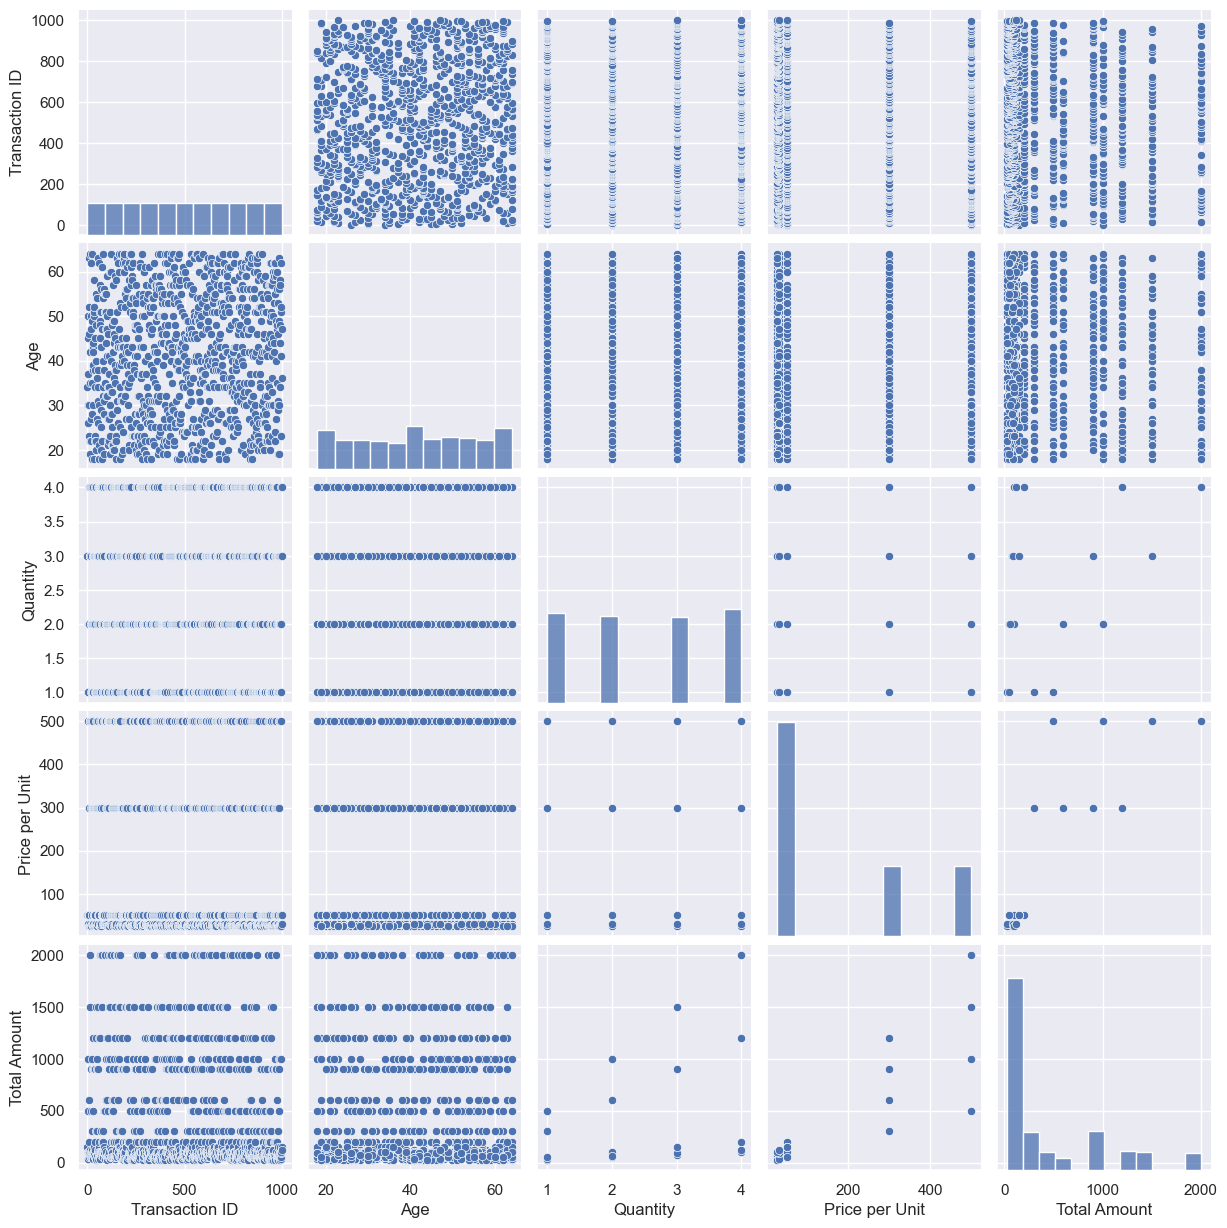

In [27]:
sns.pairplot(df)

## Customer and Product Analysis

In [29]:
df["Product Category"].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

<Axes: xlabel='Product Category', ylabel='count'>

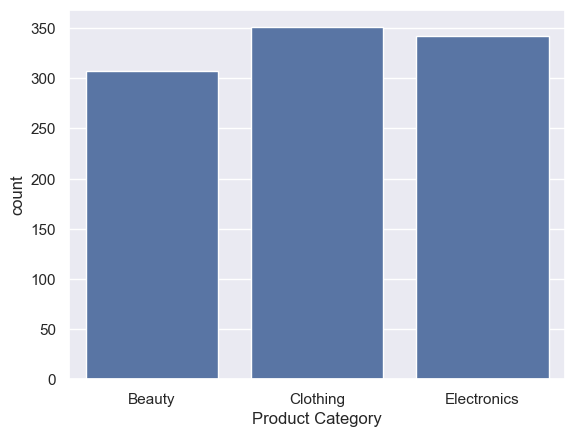

In [30]:
sns.countplot(x=df["Product Category"])

In [31]:
p = df.groupby("Product Category")[["Quantity","Total Amount"]].sum()
p

,Quantity,Total Amount
Product Category,,
Beauty,771,143515
Clothing,894,155580
Electronics,849,156905


In [32]:
cate=df["Product Category"].value_counts()

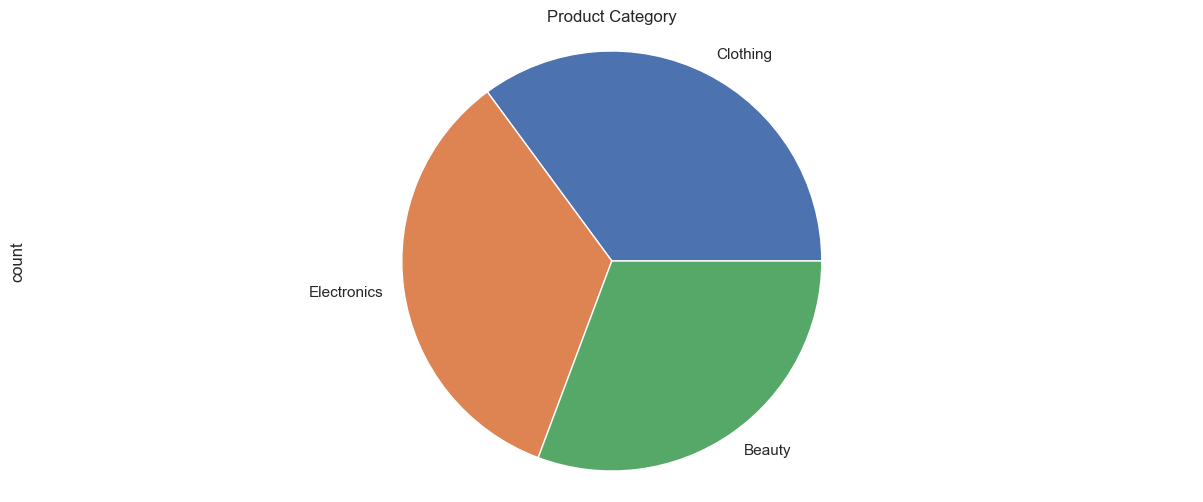

In [33]:
explode_list=[0,0.1,0.1]
color_list=["Red","Blue","Seagreen"]
cate.plot(kind="pie", figsize=(15,6))
plt.title("Product Category")
plt.axis("equal")
plt.show()

In [34]:
gen=df["Gender"].value_counts()
gen

Gender
Female    510
Male      490
Name: count, dtype: int64

## CREATING A BASE MODEL USING LOGISTIC REGRESSION AND ANALYSIS

R-squared (R2) Score: 0.8568772264250432


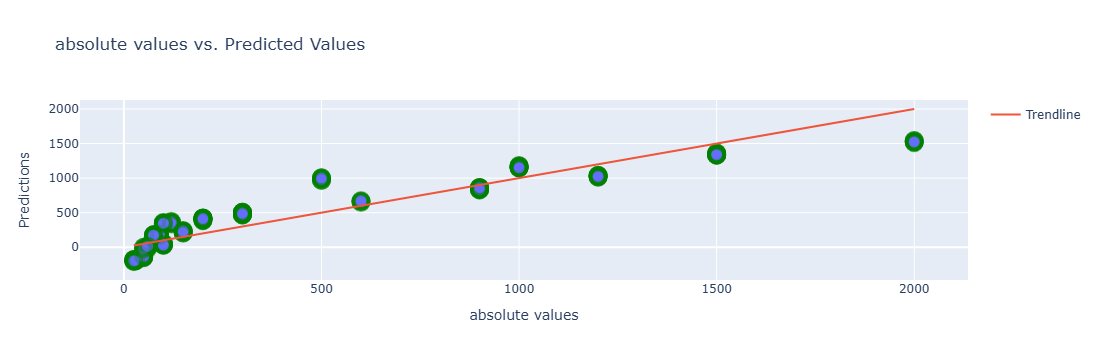

In [50]:
df=pd.read_csv("retail_sales_dataset.csv")

# Creating train/test split
x = df[['Age', 'Quantity', 'Price per Unit']]
y = df['Total Amount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating model
clf = LinearRegression()
clf.fit(x_train, y_train)
#if the given dataset is in terms of textbased and contains a linear distribution then we can move to linearregression algorithm
# we can also use random classification if needed it more productive
# Making predictions
y_prediction = clf.predict(x_test)

# Evaluating model performance
r2 = r2_score(y_test, y_prediction) # it is used to find the mean of the testing and trained model
print(f"R-squared (R2) Score: {r2}")
df1 = pd.DataFrame({'absolute values': y_test, 'Predictions': y_prediction})

#scatter plot
plot = px.scatter(df1, x='absolute values', y='Predictions', title='absolute values vs. Predicted Values')
plot.update_traces(marker=dict(size=15, opacity=0.5, line=dict(width=4, color='green')))

# Add hover data (x and y coordinates)
plot.update_traces(customdata=df.index)

plot.update_traces(hovertemplate='absolute values: %{x}<br>Predicted Value: %{y}<br>Sample Index: %{customdata}')
plot.add_trace(go.Scatter(x=df1['absolute values'], y=df1['absolute values'], mode='lines', name='Trendline'))

# Customize the layout
plot.update_layout(
    xaxis_title="absolute values",
    yaxis_title="Predictions"
)

plot.show()